In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit

In [2]:
data =  pd.read_csv('data/5.1a.txt',sep='\t',names=['angle','intensity'],engine='python')
data.head(5)

,angle,intensity
0,2.0,2.3
1,2.1,3.2
2,2.2,2.2
3,2.3,2.4
4,2.4,2.2


In [3]:
angle_min = 4.7
angle_max = 25
sample_rate = 1500

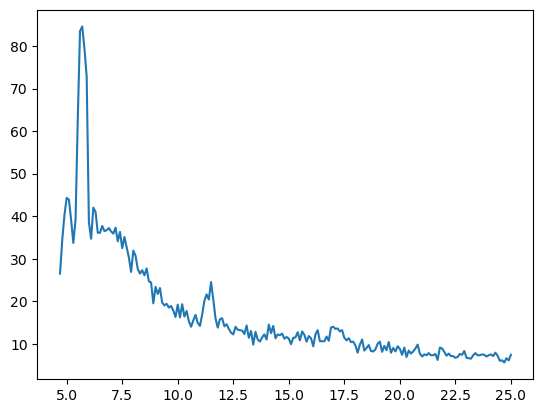

In [4]:
data_crop = data.query(f'{angle_min}<=angle<={angle_max}') 
plt.plot(data_crop['angle'],data_crop['intensity'])

In [5]:
def Gaussian(x, a, x0, sigma, offset=0):
    """
    1-dimensional Gaussian distribution

    Parameters
    ----------
    x : np.array
        Coordinates
    a : float
        Amplitude
    x0 : float
        Center
    sigma : float
        Standard deviation
    offset : float, optional
        Absolute offset value, defaults to 0

    Returns
    -------
    np.array
    """
    gauss = a * np.exp(-0.5 * np.square((x-x0)/sigma))
    #(1 / (sigma * np.sqrt(2 * np.pi)))
    return offset + gauss

def Gaussian_linoff(x,a1,x01,sigma1,m,b):
    '''Sum of two Gaussians and an linear offset 
    '''
    return Gaussian(x,a1,x01,sigma1)+m*x+b

def Double_Gaussian_linoff(x,a1,x01,sigma1,a2,x02,sigma2,m,b):
    '''Sum of two Gaussians and an linear offset 
    '''
    return Gaussian(x,a1,x01,sigma1)+Gaussian(x,a2,x02,sigma2)+m*x+b

def Five_Gaussian_linoff(x,a1,x01,sigma1,a2,x02,sigma2,a3,x03,sigma3,a4,x04,sigma4,a5,x05,sigma5,m,b,c):
    '''Sum of two Gaussians and an linear offset 
    '''
    return Gaussian(x,a1,x01,sigma1)+Gaussian(x,a2,x02,sigma2)+Gaussian(x,a3,x03,sigma3)+Gaussian(x,a4,x04,sigma4)+Gaussian(x,a5,x05,sigma5)+m/(x-c)+b

In [6]:
gmodel = lmfit.Model(Five_Gaussian_linoff)
print(f'parameter names: {gmodel.param_names}')
print(f'independent variables: {gmodel.independent_vars}')

parameter names: ['a1', 'x01', 'sigma1', 'a2', 'x02', 'sigma2', 'a3', 'x03', 'sigma3', 'a4', 'x04', 'sigma4', 'a5', 'x05', 'sigma5', 'm', 'b', 'c']
independent variables: ['x']


In [7]:
init_params = dict(a1=23, x01=6.5, sigma1=2,
                   a2=20, x02=5, sigma2=0.2,
                   a3=50, x03=5.7, sigma3=0.2,
                   a4=10, x04=11.4, sigma4=0.4,
                   a5=4, x05=17.2, sigma5=0.3,
                   #m=-0.5, b=18, c=0)
                   m=100, b=2, c=0)
params = gmodel.make_params(**init_params)
params

name,value,initial value,min,max,vary
a1,23.0000000,23.0,-inf,inf,True
x01,6.50000000,6.5,-inf,inf,True
sigma1,2.00000000,2.0,-inf,inf,True
a2,20.0000000,20.0,-inf,inf,True
x02,5.00000000,5.0,-inf,inf,True
sigma2,0.20000000,0.2,-inf,inf,True
a3,50.0000000,50.0,-inf,inf,True
x03,5.70000000,5.7,-inf,inf,True
sigma3,0.20000000,0.2,-inf,inf,True
a4,10.0000000,10.0,-inf,inf,True


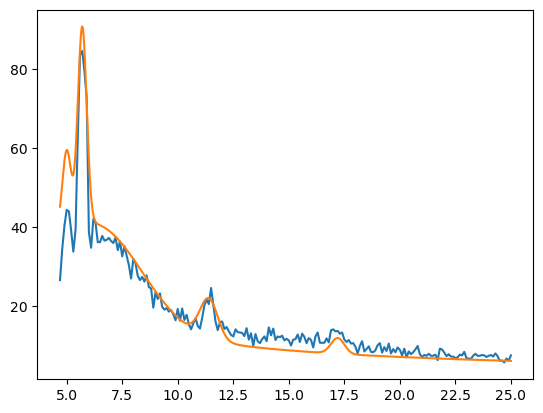

In [8]:
x_eval = np.linspace(angle_min,angle_max,sample_rate)
y_eval = gmodel.eval(x=x_eval,params = params)
plt.plot(data_crop['angle'],data_crop['intensity'])
plt.plot(x_eval,y_eval)

In [9]:
result = gmodel.fit(data=data_crop['intensity'], params=params, x=data_crop['angle'])
print(1 - result.residual.var() / np.var(data_crop['intensity']))
result.params

0.9855684349685552


name,value,standard error,relative error,initial value,min,max,vary
a1,18.3040811,1.99330985,(10.89%),23.0,-inf,inf,True
x01,6.82763589,0.13926676,(2.04%),6.5,-inf,inf,True
sigma1,1.43012074,0.15255921,(10.67%),2.0,-inf,inf,True
a2,16.7964048,1.81430465,(10.80%),20.0,-inf,inf,True
x02,5.01318563,0.01365746,(0.27%),5.0,-inf,inf,True
sigma2,0.13874776,0.01835222,(13.23%),0.2,-inf,inf,True
a3,56.3478086,1.59951845,(2.84%),50.0,-inf,inf,True
x03,5.70033142,0.00431449,(0.08%),5.7,-inf,inf,True
sigma3,0.16970912,0.00572597,(3.37%),0.2,-inf,inf,True
a4,8.62843318,1.17547785,(13.62%),10.0,-inf,inf,True


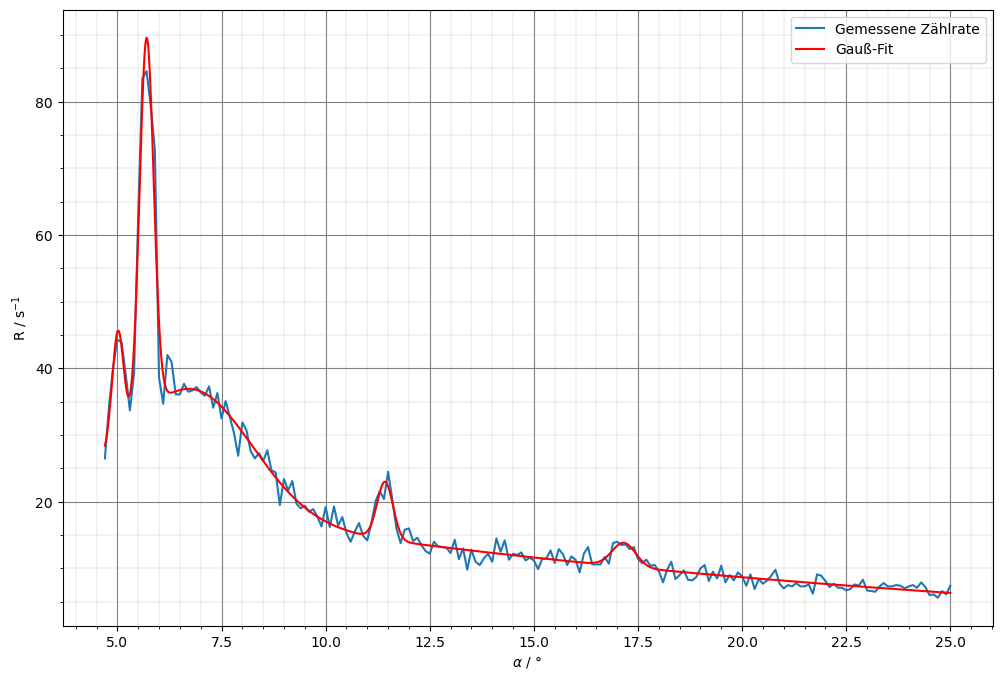

In [10]:
# Plot
plt.figure(figsize=(12,8))

plt.plot(data_crop['angle'],data_crop['intensity'], label="Gemessene Zählrate")
#plt.errorbar(data_crop['angle'],data_crop['intensity'], xerr=0.0013, yerr=np.abs(data_crop['intensity']*0.02),
             #fmt='o', capsize=1.2, linewidth=1.2, ms=2, color="darkorange", label="Messwerte")
plt.plot(x_eval,result.eval(params=result.params,x=x_eval), color="red", label="Gauß-Fit")

plt.grid(which="both")
plt.rc('axes', titlesize = 11)
plt.rc('font', size = 10)
plt.minorticks_on()
plt.tick_params(which="major", grid_color='grey')
plt.tick_params(which="minor", grid_linewidth=0.2)
#plt.title(r"Zeeman-Aufspaltung bei $\mathrm{I}=(7.57 \pm 0.02)\,\mathrm{A}$")
#plt.xlim(2,25)
plt.xlabel(r"$\alpha~/~°$")
plt.ylabel(r"R / $\mathrm{s}^{-1}$")

plt.legend(loc="upper right")

#plt.savefig('figs/plot_5.1a.png')

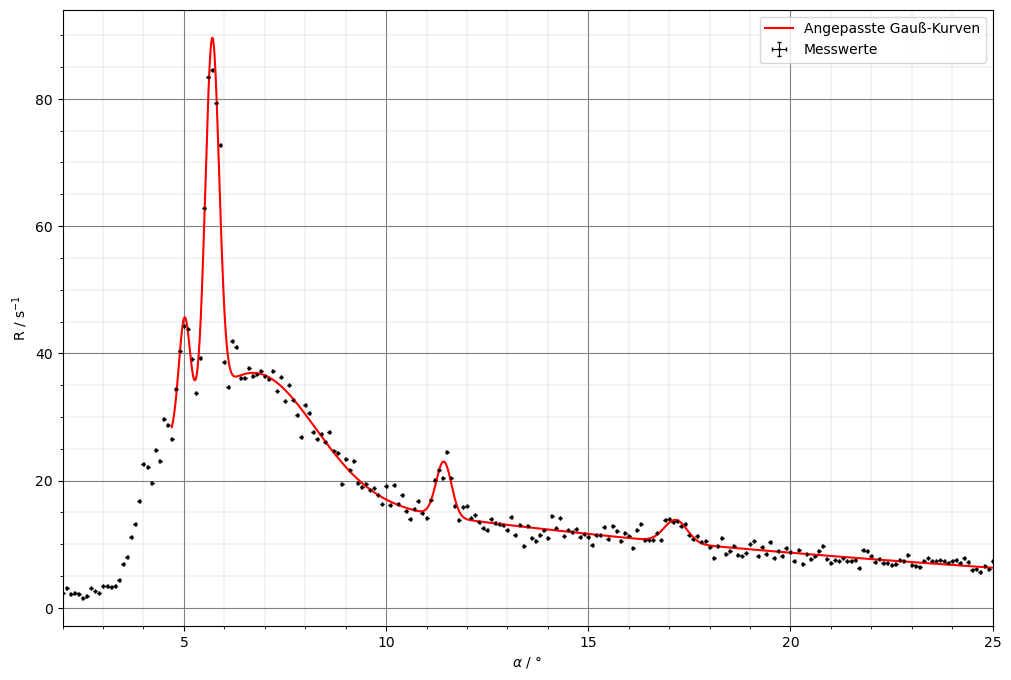

In [12]:
# Plot
plt.figure(figsize=(12,8))

#plt.plot(data['angle'],data['intensity'], color="black", linewidth=0.8, label="Gemessene Zählrate")
plt.errorbar(data['angle'],data['intensity'], xerr=0.01, yerr=0,#np.abs(data_crop['intensity']*0.02),
             fmt='o', capsize=1.2, linewidth=0.8, ms=1, color="black", label="Messwerte")
plt.plot(x_eval,result.eval(params=result.params,x=x_eval), color="red", label=r"Angepasste Gauß-Kurven")

plt.grid(which="both")
plt.rc('axes', titlesize = 11)
plt.rc('font', size = 10)
plt.minorticks_on()
plt.tick_params(which="major", grid_color='grey')
plt.tick_params(which="minor", grid_linewidth=0.2)
#plt.title(r"Zeeman-Aufspaltung bei $\mathrm{I}=(7.57 \pm 0.02)\,\mathrm{A}$")
plt.xlim(2,25)
plt.xlabel(r"$\alpha~/~°$")
plt.ylabel(r"R / $\mathrm{s}^{-1}$")

plt.legend(loc="upper right")

plt.savefig('figs/plot_5.1a.png')